In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# from lib_signal_processing import Lagrange_Coeffs, Sinc_Rect_Coeffs, Interpolate
# AUTOMATICALLY RELOAD LIBRARIES BEFORE EXECUTION 
%load_ext autoreload 
%autoreload 2

In [2]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

points = np.random.rand(1000, 2) # COORDINATES PAIRS
print points.shape

values = func(points[:,0], points[:,1]) # func CAN FEED ON VECTORS AS WELL
print values.shape

# print type(points[0])
# x = np.linspace(1, 10, 10)
# y = np.linspace(1, 100, 5)
# print y
# xx, yy = np.meshgrid(x, y)
# print xx

(1000, 2)
(1000,)


In [3]:
from scipy.interpolate import griddata

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j] # SIMILAR TO np.meshgrid()

# print len(grid_x)
grid_z0 = griddata(points, values, (grid_x, grid_y), method = 'nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method = 'linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method = 'cubic')

/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


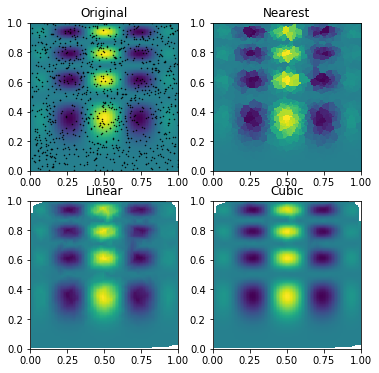

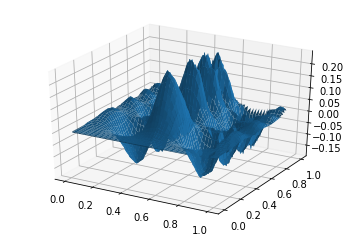

In [4]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')

plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')

plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(grid_x, grid_y, grid_z1)

In [5]:
print '{:1}'.format(1)

1


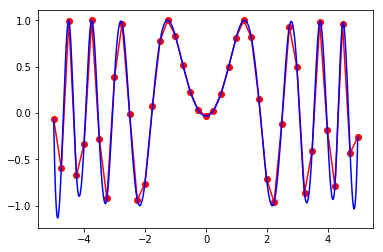

In [6]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2 + yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')
#f = interpolate.interp2d(x, y, z, kind = 'linear')
    

xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()